In [93]:
# pip install pyarrow

In [94]:
# pip install fastparquet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os


In [3]:
os.getcwd()

'C:\\Users\\hp\\MACHINE LEARNING'

In [4]:
os.chdir(r"C:\\Users\\hp\\MACHINE LEARNING")

In [5]:
os.listdir()

['.ipynb_checkpoints',
 'LOGISTIC REGRESSION.ipynb',
 'NYC Cab Assignment.ipynb',
 'practise.ipynb',
 'REGRESSION.ipynb',
 'TAXI DATA.ipynb',
 'yellow_tripdata_2023-01.parquet']

In [6]:
taxi_data=pd.read_parquet("yellow_tripdata_2023-01.parquet")

In [7]:
taxi_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


In [8]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

## EDA

In [9]:
taxi_data["store_and_fwd_flag"].value_counts()  # y=store and forward trip  ,  n=not a store and forward trip

N    2975020
Y      20003
Name: store_and_fwd_flag, dtype: int64

In [10]:
taxi_data["store_and_fwd_flag"].isnull().sum()

71743

In [11]:
taxi_data["store_and_fwd_flag"]=taxi_data["store_and_fwd_flag"].fillna("N")

In [12]:
taxi_data["store_and_fwd_flag"].isnull().sum()

0

In [13]:
taxi_data["store_and_fwd_flag"]=np.where(taxi_data["store_and_fwd_flag"]=="N",0,1)

In [14]:
taxi_data["store_and_fwd_flag"].dtypes

dtype('int32')

In [15]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,0,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,0,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,0,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,0,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,0,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [16]:
taxi_data["trip_duration"]=taxi_data["tpep_dropoff_datetime"]-taxi_data["tpep_pickup_datetime"]

In [17]:
taxi_data.drop(columns=["tpep_pickup_datetime","tpep_dropoff_datetime"],inplace=True)

In [18]:
taxi_data.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'airport_fee', 'trip_duration'],
      dtype='object')

In [19]:
taxi_data["VendorID"].value_counts()

2    2239399
1     827367
Name: VendorID, dtype: int64

In [20]:
taxi_data["VendorID"].isnull().sum()

0

In [21]:
taxi_data["passenger_count"].nunique()

10

In [22]:
taxi_data["passenger_count"].value_counts()

1.0    2261400
2.0     451536
3.0     106353
4.0      53745
0.0      51164
5.0      42681
6.0      28124
8.0         13
7.0          6
9.0          1
Name: passenger_count, dtype: int64

In [23]:
taxi_data["passenger_count"].isnull().sum()

71743

In [24]:
taxi_data["passenger_count"].fillna(1,inplace=True)

In [25]:
taxi_data["passenger_count"].isnull().sum()

0

In [26]:
taxi_data["trip_distance"].isnull().sum()

0

In [27]:
taxi_data["RatecodeID"].value_counts()

1.0     2839305
2.0      114239
5.0       15043
99.0      13106
3.0        8958
4.0        4366
6.0           6
Name: RatecodeID, dtype: int64

In [28]:
taxi_data["RatecodeID"].isnull().sum()

71743

In [29]:
taxi_data["RatecodeID"].fillna(1,inplace=True)   #standard rate

In [30]:
taxi_data["RatecodeID"].isnull().sum()

0

In [31]:
taxi_data["store_and_fwd_flag"].isnull().sum()

0

In [32]:
taxi_data["PULocationID"].isnull().sum()

0

In [33]:
taxi_data["DOLocationID"].isnull().sum()

0

In [34]:
taxi_data["payment_type"].isnull().sum()

0

In [35]:
taxi_data["fare_amount"].isnull().sum()

0

In [36]:
taxi_data["extra"].isnull().sum()

0

In [37]:
taxi_data["mta_tax"].isnull().sum()

0

In [38]:
taxi_data["tip_amount"].isnull().sum()

0

In [39]:
taxi_data["tolls_amount"].isnull().sum()

0

In [40]:
taxi_data["improvement_surcharge"].isnull().sum()

0

In [41]:
taxi_data["total_amount"].isnull().sum()

0

In [42]:
taxi_data["congestion_surcharge"].isnull().sum()

71743

In [43]:
taxi_data["congestion_surcharge"].value_counts()

 2.5    2744268
 0.0     231037
-2.5      19718
Name: congestion_surcharge, dtype: int64

In [44]:
taxi_data["congestion_surcharge"].fillna(0,inplace=True)


In [45]:
taxi_data["airport_fee"].value_counts()

 0.00    2730456
 1.25     260960
-1.25       3607
Name: airport_fee, dtype: int64

In [46]:
taxi_data["airport_fee"].isnull().sum()

71743

In [47]:
taxi_data["airport_fee"].fillna(0,inplace=True)

In [48]:
taxi_data["trip_duration"].isnull().sum()

0

In [49]:
taxi_data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration
0,2,1.0,0.97,1.0,0,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26
1,2,1.0,1.10,1.0,0,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19
2,2,1.0,2.51,1.0,0,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45
3,1,0.0,1.90,1.0,0,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37
4,2,1.0,1.43,1.0,0,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50


In [50]:
taxi_data["trip_total_amount"]=taxi_data["total_amount"]+taxi_data["congestion_surcharge"]+taxi_data["airport_fee"]

In [51]:
taxi_data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,trip_total_amount
0,2,1.0,0.97,1.0,0,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26,16.80
1,2,1.0,1.10,1.0,0,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19,19.40
2,2,1.0,2.51,1.0,0,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45,37.40
3,1,0.0,1.90,1.0,0,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37,22.10
4,2,1.0,1.43,1.0,0,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50,22.18


In [52]:
taxi_data.drop(columns=["total_amount","congestion_surcharge","airport_fee"],inplace=True)

In [53]:
taxi_data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,trip_duration,trip_total_amount
0,2,1.0,0.97,1.0,0,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,0 days 00:08:26,16.80
1,2,1.0,1.10,1.0,0,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,0 days 00:06:19,19.40
2,2,1.0,2.51,1.0,0,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,0 days 00:12:45,37.40
3,1,0.0,1.90,1.0,0,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,0 days 00:09:37,22.10
4,2,1.0,1.43,1.0,0,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,0 days 00:10:50,22.18


In [54]:
taxi_data.drop(columns=["extra","mta_tax","tip_amount","tolls_amount","improvement_surcharge"],inplace=True)

In [55]:
taxi_data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,trip_duration,trip_total_amount
0,2,1.0,0.97,1.0,0,161,141,2,9.3,0 days 00:08:26,16.80
1,2,1.0,1.10,1.0,0,43,237,1,7.9,0 days 00:06:19,19.40
2,2,1.0,2.51,1.0,0,48,238,1,14.9,0 days 00:12:45,37.40
3,1,0.0,1.90,1.0,0,138,7,1,12.1,0 days 00:09:37,22.10
4,2,1.0,1.43,1.0,0,107,79,1,11.4,0 days 00:10:50,22.18


## OUTLIERS

In [56]:
taxi_data.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'trip_duration', 'trip_total_amount'],
      dtype='object')

In [57]:
taxi_data.describe(percentiles=[0.01,0.03,0.05,0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9,0.92,0.94,0.96,0.98,1.00]).T

,count,mean,std,min,1%,3%,5%,10%,20%,30%,...,50%,70%,80%,90%,92%,94%,96%,98%,100%,max
VendorID,3066766.0,1.730215,0.443848,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
passenger_count,3066766.0,1.354051,0.88727,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,2.0,2.0,3.0,4.0,5.0,9.0,9.0
trip_distance,3066766.0,3.847342,249.583756,0.0,0.0,0.37,0.5,0.68,0.93,1.2,...,1.8,2.84,4.1,8.63,10.0,11.93,16.8,18.6,258928.15,258928.15
RatecodeID,3066766.0,1.485803,6.399026,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,99.0,99.0
store_and_fwd_flag,3066766.0,0.006523,0.080498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
PULocationID,3066766.0,166.398046,64.244131,1.0,24.0,43.0,48.0,75.0,113.0,138.0,...,162.0,230.0,236.0,239.0,246.0,249.0,262.0,263.0,265.0,265.0
DOLocationID,3066766.0,164.392631,69.943682,1.0,10.0,33.0,43.0,65.0,97.0,138.0,...,162.0,231.0,236.0,243.0,246.0,255.0,262.0,263.0,265.0,265.0
payment_type,3066766.0,1.194483,0.529476,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0
fare_amount,3066766.0,18.367069,17.807822,-900.0,3.0,5.1,5.8,6.5,7.9,9.3,...,12.8,17.7,23.3,38.7,44.3,54.1,70.0,70.0,1160.1,1160.1
trip_duration,3066766,0 days 00:15:40.139710039,0 days 00:42:35.661074517,-1 days +23:30:48,0 days 00:00:47,0 days 00:02:36,0 days 00:03:18,0 days 00:04:29,0 days 00:06:17,0 days 00:07:57,...,0 days 00:11:31,0 days 00:16:31,0 days 00:20:32,0 days 00:27:56.500000,0 days 00:30:33,0 days 00:34:06,0 days 00:39:27,0 days 00:48:44,6 days 23:09:11,6 days 23:09:11


{'whiskers': [<matplotlib.lines.Line2D at 0x2991887d130>,
 'caps': [<matplotlib.lines.Line2D at 0x2991888bb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2991888b3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x29918f45100>],
 'fliers': [<matplotlib.lines.Line2D at 0x29918f453d0>],
 'means': []}

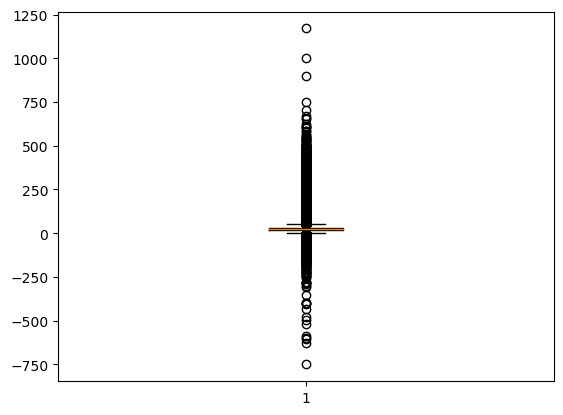

In [58]:
plt.boxplot(taxi_data["trip_total_amount"])

In [59]:
def outlier_method(x):
    x=x.clip(upper=x.quantile(.95))
    x=x.clip(lower=x.quantile(.05))
    return x

In [60]:
taxi_data.apply(outlier_method)

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,trip_duration,trip_total_amount
0,2,1.0,0.97,1.0,0,161,141,2,9.30,0 days 00:08:26,16.80
1,2,1.0,1.10,1.0,0,48,237,1,7.90,0 days 00:06:19,19.40
2,2,1.0,2.51,1.0,0,48,238,1,14.90,0 days 00:12:45,37.40
3,1,1.0,1.90,1.0,0,138,43,1,12.10,0 days 00:09:37,22.10
4,2,1.0,1.43,1.0,0,107,79,1,11.40,0 days 00:10:50,22.18
...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,1.0,3.05,1.0,0,107,48,1,15.80,0 days 00:13:59,23.76
3066762,2,1.0,5.80,1.0,0,112,75,1,22.43,0 days 00:19:27,29.07
3066763,2,1.0,4.67,1.0,0,114,239,1,17.61,0 days 00:24:31,26.93
3066764,2,1.0,3.15,1.0,0,230,79,1,18.15,0 days 00:13:00,26.58


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_total_amount'>

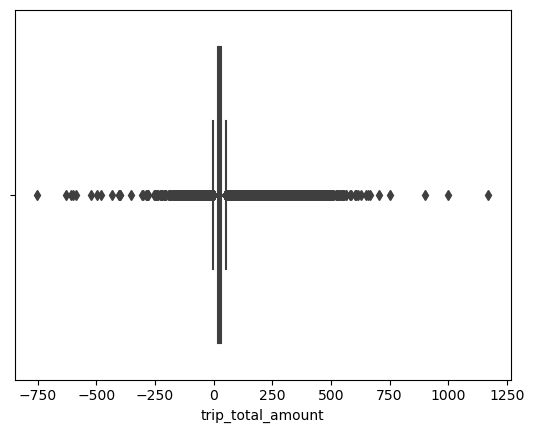

In [61]:
sns.boxplot(taxi_data["trip_total_amount"])

In [62]:
taxi_data["trip_total_amount"].skew() #it mean this data is positive skewed

2.7495202902705125

In [63]:
taxi_data["trip_total_amount"].kurt()  #leptocurtic

25.866169465816025

## YEO JOHNSON TRANSFORMATION

In [64]:
from scipy.stats import yeojohnson


In [65]:
total=taxi_data["trip_total_amount"].values
transformed_total, _ =yeojohnson(total)


In [66]:
taxi_data['trip_total_amount']= transformed_total

In [67]:
taxi_data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,trip_duration,trip_total_amount
0,2,1.0,0.97,1.0,0,161,141,2,9.3,0 days 00:08:26,14.261651
1,2,1.0,1.10,1.0,0,43,237,1,7.9,0 days 00:06:19,16.311322
2,2,1.0,2.51,1.0,0,48,238,1,14.9,0 days 00:12:45,30.034541
3,1,0.0,1.90,1.0,0,138,7,1,12.1,0 days 00:09:37,18.417614
4,2,1.0,1.43,1.0,0,107,79,1,11.4,0 days 00:10:50,18.479708


## AGAIN

In [76]:
# taxi_data['trip_total_amount'].skew()  #1.13

In [77]:
# taxi_data['trip_total_amount'].kurt()    =51.72

In [78]:
# trip_total_amount = taxi_data['trip_total_amount'].values
# x=np.log1p(trip_total_amount)
# taxi_data["y"]=x

In [79]:
# taxi_data["y"].skew()  =1.00

In [80]:
# taxi_data["y"].kurt()   =1.55

In [81]:
# sns.boxplot(taxi_data["y"])

In [82]:
# taxi_data.rename(columns={"y": "total_trip_amount"},inplace=True)

In [83]:
# taxi_data.head()

In [186]:
# taxi_data.drop(columns=["trip_total_amount","z"],inplace=True)

In [84]:
# taxi_data.columns

## till

## MULTICOLLINEARITY

C:\Users\hp\AppData\Local\Temp\ipykernel_13596\2594189648.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cr=taxi_data[select].corr()


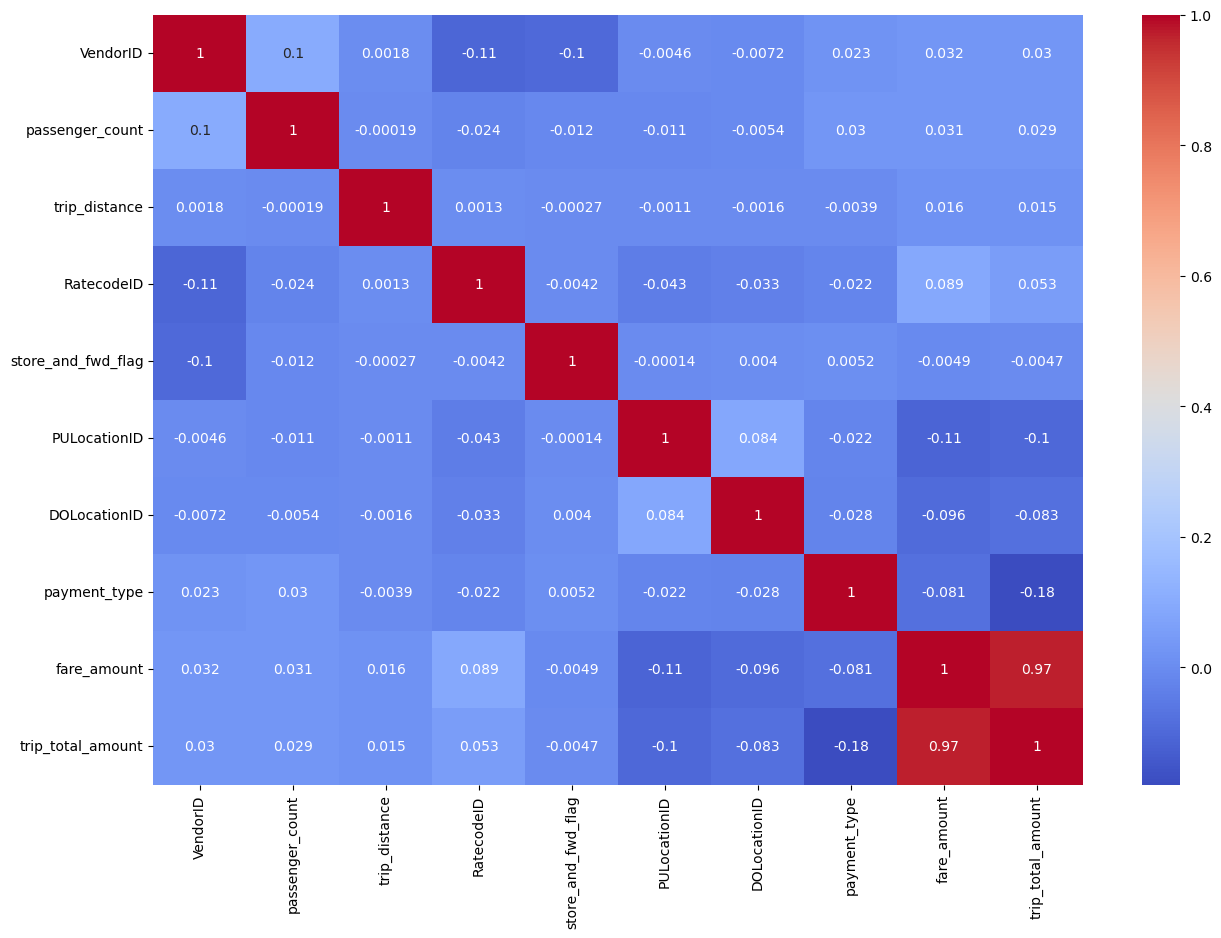

In [69]:
select=['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'trip_duration','trip_total_amount']

cr=taxi_data[select].corr()
plt.figure(figsize=(15,10))

sns.heatmap(cr,annot=True,cmap="coolwarm")
plt.show()

In [70]:
taxi_data.dtypes

VendorID                        int64
passenger_count               float64
trip_distance                 float64
RatecodeID                    float64
store_and_fwd_flag              int32
PULocationID                    int64
DOLocationID                    int64
payment_type                    int64
fare_amount                   float64
trip_duration         timedelta64[ns]
trip_total_amount             float64
dtype: object

In [71]:
taxi_data['duration_minutes'] = round(taxi_data['trip_duration'].apply(lambda x: x.total_seconds() / 60),2)




In [72]:
taxi_data.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,trip_duration,trip_total_amount,duration_minutes
0,2,1.0,0.97,1.0,0,161,141,2,9.3,0 days 00:08:26,14.261651,8.43
1,2,1.0,1.10,1.0,0,43,237,1,7.9,0 days 00:06:19,16.311322,6.32
2,2,1.0,2.51,1.0,0,48,238,1,14.9,0 days 00:12:45,30.034541,12.75
3,1,0.0,1.90,1.0,0,138,7,1,12.1,0 days 00:09:37,18.417614,9.62
4,2,1.0,1.43,1.0,0,107,79,1,11.4,0 days 00:10:50,18.479708,10.83


In [73]:
taxi_data.drop(columns="trip_duration",inplace=True)

## VIF

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x=taxi_data[['VendorID','passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'duration_minutes']]

# VIF dataframe
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns

# calculating vif for each factors
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data.sort_values(by=["VIF"],ascending=False)

,feature,VIF
0,VendorID,10.354797
5,PULocationID,6.388246
6,DOLocationID,5.630785
7,payment_type,5.217563
1,passenger_count,3.266373
8,fare_amount,2.108166
9,duration_minutes,1.187884
3,RatecodeID,1.061148
4,store_and_fwd_flag,1.011118
2,trip_distance,1.000514


## OLS REGRESSION RESULT

In [75]:
import statsmodels.api as sm
x=taxi_data[['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'duration_minutes']]
y=taxi_data['trip_total_amount']
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())   #remove those columns whose p value is more than 0.05
# adj r value tells that the data we take is imp or not

#we drop store_and_fwd_flag because p>alpha

                            OLS Regression Results                            
Dep. Variable:      trip_total_amount   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 5.791e+06
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:28:47   Log-Likelihood:            -8.4211e+06
No. Observations:             3066766   AIC:                         1.684e+07
Df Residuals:                 3066755   BIC:                         1.684e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.6391      0

## MODELLING

In [85]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [86]:
taxi_data.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'trip_total_amount', 'duration_minutes'],
      dtype='object')

In [88]:
y=taxi_data["trip_total_amount"]
x=taxi_data[['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount','duration_minutes']]

In [89]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=0)

In [90]:
reg=LinearRegression()

In [91]:
reg.fit(x_train,y_train)

LinearRegression()

In [92]:
reg.fit(x_test,y_test)

LinearRegression()

In [93]:
reg.score(x_train,y_train)

0.9495183486652186

In [94]:
reg.score(x_test,y_test)

0.950149939336046

In [95]:
pred_train=reg.predict(x_train)
pred_test=reg.predict(x_test)

In [96]:
metrics.mean_squared_error(y_train,pred_train)

14.285451135449577

In [97]:
metrics.mean_squared_error(y_test,pred_test)

14.035686287000768

In [98]:
predict=pd.DataFrame({"Actual":(y_train),
                     "Predicted":(pred_train)})

predict

,Actual,Predicted
1352335,14.023655,13.234240
1319401,19.779789,19.122194
1311548,51.043912,54.434540
1643080,10.410246,6.988106
576941,19.424540,21.356359
...,...,...
2249467,14.340911,13.821595
963395,31.299000,31.356656
2215104,11.220917,10.059686
1484405,16.585570,16.728695


<AxesSubplot:>

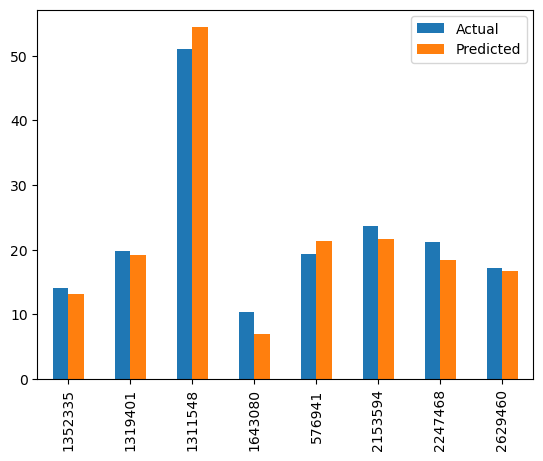

In [99]:
predict.head(8).plot(kind="bar")